In [4]:
## FINANCIAL ANALYTICS

In [2]:
#import all the Libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"Financial Analytics data.csv")
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [4]:
df.shape

(488, 5)

In [5]:
df.isna().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.fillna(0,inplace=True)

In [8]:
df.isna().sum()

S.No.                0
Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
Unnamed: 4           0
dtype: int64

In [9]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [10]:
# Renamiong the Column names 
df.columns = ['S.No.', 'Bank Names', 'Market_Capital-Crore', 'Sales_Qtr-Crore']

In [11]:
# Preinting the Data after renaming
print(df)

     S.No.       Bank Names  Market_Capital-Crore  Sales_Qtr-Crore
0        1   Reliance Inds.             583436.72         99810.00
1        2              TCS             563709.84         30904.00
2        3        HDFC Bank             482953.59         20581.27
3        4              ITC             320985.27          9772.02
4        5          H D F C             289497.37         16840.51
..     ...              ...                   ...              ...
483    496  Lak. Vilas Bank               3029.57           790.17
484    497            NOCIL               3026.26           249.27
485    498    Orient Cement               3024.32           511.53
486    499  Natl.Fertilizer               3017.07          2840.75
487    500        L T Foods                  0.00             0.00

[488 rows x 4 columns]


In [19]:
df['MarketCap_to_Sales_Ratio'] = df['Market_Capital-Crore'] / df['Sales_Qtr-Crore']

In [12]:
df['Market_Capital-Crore'] = pd.to_numeric(df['Market_Capital-Crore'], errors='coerce')
df['Sales_Qtr-Crore'] = pd.to_numeric(df['Sales_Qtr-Crore'], errors='coerce')

In [13]:
# Exploratory Data Analysis

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


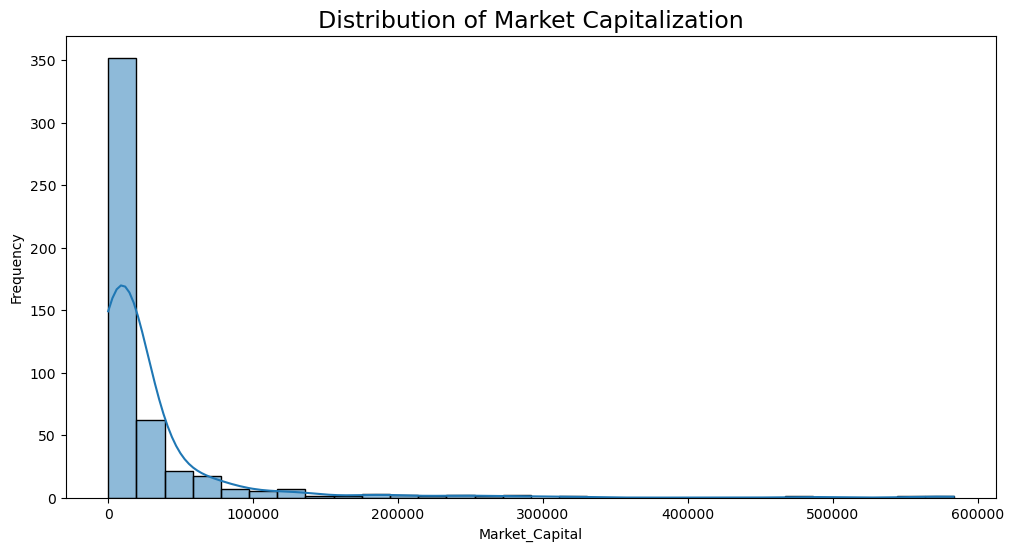

In [14]:
# Distribution of Market Capitalization
plt.figure(figsize=(12,6))
sns.histplot(df['Market_Capital-Crore'], bins=30, kde=True)
plt.title('Distribution of Market Capitalization',fontsize = 17)
plt.xlabel('Market_Capital',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


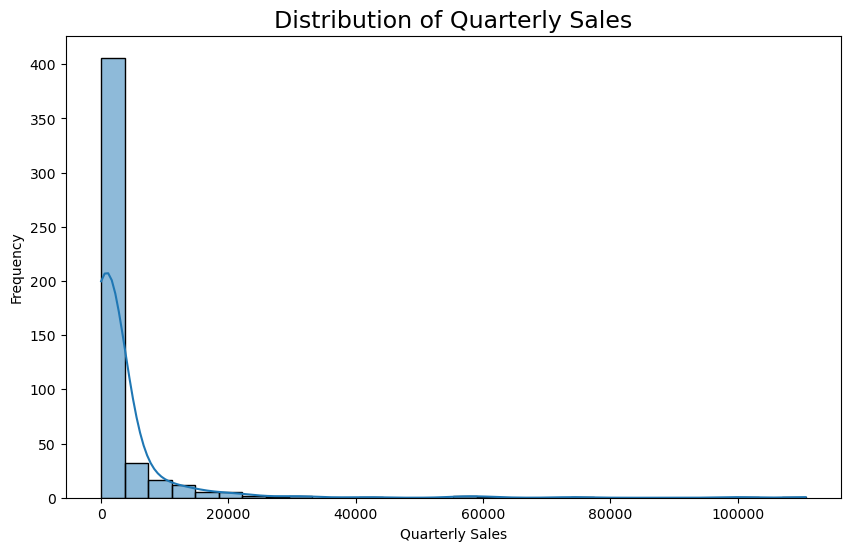

In [15]:
# Distribution of Quarterly Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales_Qtr-Crore'], bins=30, kde=True)
plt.title('Distribution of Quarterly Sales',fontsize = 17)
plt.xlabel('Quarterly Sales',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.show()

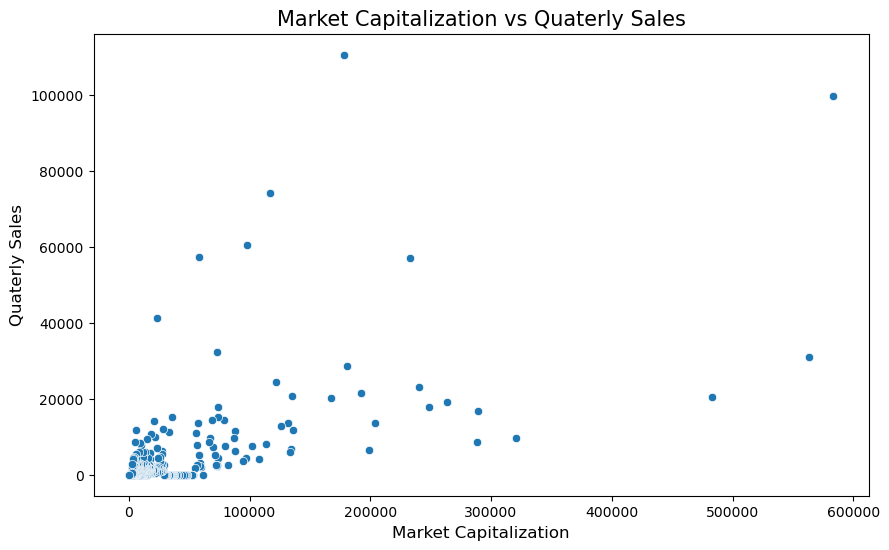

In [16]:
# Relationship between Market Capitalization and Quarterly Sales
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Market_Capital-Crore', y='Sales_Qtr-Crore')
plt.title("Market Capitalization vs Quaterly Sales", fontsize = 15)
plt.xlabel('Market Capitalization', fontsize = 12)
plt.ylabel('Quaterly Sales', fontsize = 12)
plt.show()

In [24]:
# Correlation Analysis
correlation_matrix = df[['Market_Capital-Crore', 'Sales_Qtr-Crore', 'MarketCap_to_Sales_Ratio']].corr()
print(correlation_matrix)

                          Market_Capital-Crore  Sales_Qtr-Crore  \
Market_Capital-Crore                  1.000000         0.620845   
Sales_Qtr-Crore                       0.620845         1.000000   
MarketCap_to_Sales_Ratio              0.097460        -0.190282   

                          MarketCap_to_Sales_Ratio  
Market_Capital-Crore                      0.097460  
Sales_Qtr-Crore                          -0.190282  
MarketCap_to_Sales_Ratio                  1.000000  


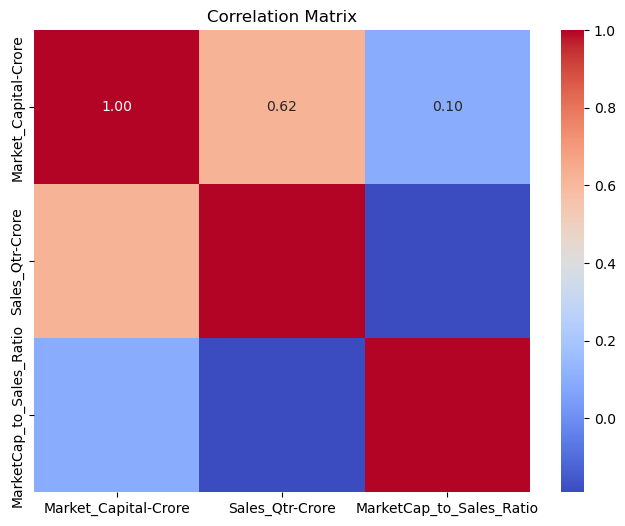

In [25]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [29]:
key_metrics = df[['Bank Names', 'Market_Capital-Crore', 'Sales_Qtr-Crore', 'MarketCap_to_Sales_Ratio']]
print("\nTop 10 companies by Market Capitalization:")
print(key_metrics.sort_values(by='Market_Capital-Crore', ascending=False).head(10))


Top 10 companies by Market Capitalization:
       Bank Names  Market_Capital-Crore  Sales_Qtr-Crore  \
0  Reliance Inds.             583436.72         99810.00   
1             TCS             563709.84         30904.00   
2       HDFC Bank             482953.59         20581.27   
3             ITC             320985.27          9772.02   
4         H D F C             289497.37         16840.51   
5  Hind. Unilever             288265.26          8590.00   
6   Maruti Suzuki             263493.81         19283.20   
7         Infosys             248320.35         17794.00   
8         O N G C             239981.50         22995.88   
9  St Bk of India             232763.33         57014.08   

   MarketCap_to_Sales_Ratio  
0                  5.845474  
1                 18.240676  
2                 23.465685  
3                 32.847382  
4                 17.190535  
5                 33.558237  
6                 13.664423  
7                 13.955285  
8                 10.4358

In [ ]:
<<<<<<<<<<<<<<<---------->>>>>>>>>>>>>>>     FINANCIAL ANALYSIS IS CAME TO AN END     <<<<<<<<<<<<<<<---------->>>>>>>>>>>>>>>